<a href="https://colab.research.google.com/github/hsn-baqshi/hsn-baqshi/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the module
from sklearn.model_selection import train_test_split
# Import Pandas and Numpy
import pandas as pd
import numpy as np
# Import LabelEncoder for preprocessing
from sklearn.preprocessing import LabelEncoder
# Import KNN
from sklearn.neighbors import KNeighborsClassifier
# Import plot
import matplotlib.pyplot as plt
# Import Linear Regression
from sklearn.linear_model import LinearRegression

In [3]:
# Import File
from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['ds_salaries.csv']))


Saving ds_salaries.csv to ds_salaries.csv


In [4]:
# Convert letters to numbers
le = LabelEncoder()
columns2 = []
r1,c1 = df2.shape
c2 = np.arange(1,c1+1)

for cn in c2:
  if isinstance(df2.iat[2,cn-1], str) == True:
    columns2.append(df2.columns[cn-1])

#columns = ['experience_level','company_location','company_size']
df2[columns2] = df2[columns2].apply(le.fit_transform)
df2.dropna(how='all', axis=1, inplace=True)

In [6]:
# Create X and y arrays
X = df2.drop("Salary in SAR", axis=1).values
y = df2["Salary in SAR"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))



Predictions: [308848.92454535 642809.97057086], Actual Values: [525937.5 506250. ]


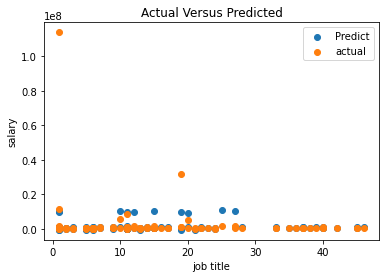

In [25]:
# Add a title
plt.title("Actual Versus Predicted")

# Plot predicted values
plt.scatter( X_test[:,4], y_pred, label="Predict")

# Plot test accuracies
plt.scatter( X_test[:,4], y_test, label="actual")

plt.legend()
plt.xlabel("job title")
plt.ylabel("salary")

# Display the plot
plt.show()